In [26]:
# ================================================================
# TASK MC.1: LOAD CLEANED DATASET
# ================================================================

import pandas as pd

# choose which cleaned dataset to compare on:
DATASET = "cleaned_student-por.csv"   # change to cleaned_student-por.csv any time

df = pd.read_csv(DATASET)
print("Loaded:", DATASET)
df.head()

Loaded: cleaned_student-por.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


In [27]:
# ================================================================
# TASK MC.2: PREPARE FEATURES (USE G1, DROP G2+G3) AND TARGET
# ================================================================

y = df["passed"]

columns_to_drop = ["passed", "G2", "G3"]
columns_to_drop = [c for c in columns_to_drop if c in df.columns]

X = df.drop(columns=columns_to_drop)

print("Dropped:", columns_to_drop)
print("X shape:", X.shape)


Dropped: ['passed', 'G2', 'G3']
X shape: (649, 31)


In [28]:
# ================================================================
# TASK MC.3: ONE-HOT ENCODE CATEGORICAL FEATURES
# ================================================================

X = pd.get_dummies(X, drop_first=True)
X.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False


In [29]:
# ================================================================
# TASK MC.4: TRAIN/TEST SPLIT
# ================================================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (519, 40) Test: (130, 40)


In [30]:
# ================================================================
# TASK MC.5: TRAIN LOGISTIC REGRESSION
# ================================================================

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

print("Logistic Regression trained.")

Logistic Regression trained.


In [31]:
# ================================================================
# TASK MC.6: TRAIN RANDOM FOREST
# ================================================================

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
rf.fit(X_train, y_train)

print("Random Forest trained.")


Random Forest trained.


In [32]:
# ================================================================
# TASK MC.7: COMPARE METRICS (ACCURACY + CLASSIFICATION REPORT)
# ================================================================

from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression predictions
lr_pred = lr.predict(X_test)

# Random Forest predictions
rf_pred = rf.predict(X_test)

print("------ Logistic Regression ------")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

print("------ Random Forest ------")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


------ Logistic Regression ------
Accuracy: 0.8384615384615385
              precision    recall  f1-score   support

           0       0.47      0.40      0.43        20
           1       0.89      0.92      0.91       110

    accuracy                           0.84       130
   macro avg       0.68      0.66      0.67       130
weighted avg       0.83      0.84      0.83       130

------ Random Forest ------
Accuracy: 0.8384615384615385
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        20
           1       0.89      0.93      0.91       110

    accuracy                           0.84       130
   macro avg       0.68      0.64      0.65       130
weighted avg       0.82      0.84      0.83       130



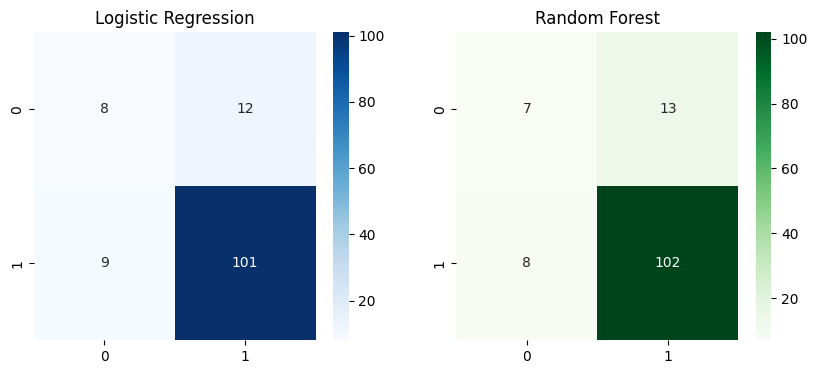

In [33]:
# ================================================================
# TASK MC.8: CONFUSION MATRICES FOR BOTH MODELS
# ================================================================

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# LR CM
cm_lr = confusion_matrix(y_test, lr_pred)

# RF CM
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest")

plt.show()
